In [1]:
from datascience import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [41]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# The first data set to be introduced is US murder rates by US State from Kaggle

In [25]:
crime = Table().read_table("US_violent_crime.csv")
crime

Unnamed: 0,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10,263,48,44.5
Arizona,8.1,294,80,31
Arkansas,8.8,190,50,19.5
California,9,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


## Each point is per 100,000 people

## Clean the Headings

In [26]:
crime = crime.relabel("Unnamed: 0", "State")
crime

State,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10,263,48,44.5
Arizona,8.1,294,80,31
Arkansas,8.8,190,50,19.5
California,9,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


## The second table we will use are unemployment rates from the National Conference of State Legislatures

In [27]:
unemployment = Table().read_table("unemployed.csv")
unemployment

State,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
Alabama,3.1,3,2.9,nan,nan,nan,nan,nan,nan,nan,nan,nan
Alaska,5.6,5.4,5,nan,nan,nan,nan,nan,nan,nan,nan,nan
Arizona,3.7,3.6,3.3,nan,nan,nan,nan,nan,nan,nan,nan,nan
Arkansas,3.2,3.1,3.1,nan,nan,nan,nan,nan,nan,nan,nan,nan
California,5.8,5.4,4.9,nan,nan,nan,nan,nan,nan,nan,nan,nan
Colorado,4.1,4,3.7,nan,nan,nan,nan,nan,nan,nan,nan,nan
Connecticut,5.3,4.9,4.6,nan,nan,nan,nan,nan,nan,nan,nan,nan
Delaware,4.8,4.6,4.5,nan,nan,nan,nan,nan,nan,nan,nan,nan
District of Columbia,6.3,6.1,6,nan,nan,nan,nan,nan,nan,nan,nan,nan
Florida,3.5,3.3,3.2,nan,nan,nan,nan,nan,nan,nan,nan,nan


# The third dataset we will use shows the poverty rates and is from the Economic Research Service

In [37]:
poverty = Table().read_table("povertyclean.csv")
poverty

Name,Percent,Lower Bound,Upper Bound,Percent.1,Lower Bound.1,Upper Bound.1
Alabama,15.6,15.2,16,21.9,21.1,22.7
Alaska,10.2,9.6,10.8,13.2,12.2,14.2
Arizona,13.5,13.2,13.8,19.2,18.4,20
Arkansas,16,15.6,16.4,21.7,20.8,22.6
California,11.8,11.7,11.9,15.6,15.3,15.9
Colorado,9.4,9.1,9.7,11.2,10.5,11.9
Connecticut,9.9,9.6,10.2,13.5,12.7,14.3
Delaware,11.2,10.6,11.8,16.3,15.2,17.4
District of Columbia,14.1,13.2,15,20.8,17.6,24
Florida,12.7,12.5,12.9,18.2,17.6,18.8


## Cleanup the labels

In [38]:
poverty = poverty.relabel("Percent", "Percent in Poverty")
poverty = poverty.relabel("Name", "State")
poverty

State,Percent in Poverty,Lower Bound,Upper Bound,Percent.1,Lower Bound.1,Upper Bound.1
Alabama,15.6,15.2,16,21.9,21.1,22.7
Alaska,10.2,9.6,10.8,13.2,12.2,14.2
Arizona,13.5,13.2,13.8,19.2,18.4,20
Arkansas,16,15.6,16.4,21.7,20.8,22.6
California,11.8,11.7,11.9,15.6,15.3,15.9
Colorado,9.4,9.1,9.7,11.2,10.5,11.9
Connecticut,9.9,9.6,10.2,13.5,12.7,14.3
Delaware,11.2,10.6,11.8,16.3,15.2,17.4
District of Columbia,14.1,13.2,15,20.8,17.6,24
Florida,12.7,12.5,12.9,18.2,17.6,18.8


# Question 1: Do the states with the highest level of violent crime have a high poverty rate?

In [53]:
povcrime = crime.join("State", poverty)
povcrime

State,Murder,Assault,UrbanPop,Rape,Percent in Poverty,Lower Bound,Upper Bound,Percent.1,Lower Bound.1,Upper Bound.1
Alabama,13.2,236,58,21.2,15.6,15.2,16,21.9,21.1,22.7
Alaska,10,263,48,44.5,10.2,9.6,10.8,13.2,12.2,14.2
Arizona,8.1,294,80,31,13.5,13.2,13.8,19.2,18.4,20
Arkansas,8.8,190,50,19.5,16,15.6,16.4,21.7,20.8,22.6
California,9,276,91,40.6,11.8,11.7,11.9,15.6,15.3,15.9
Colorado,7.9,204,78,38.7,9.4,9.1,9.7,11.2,10.5,11.9
Connecticut,3.3,110,77,11.1,9.9,9.6,10.2,13.5,12.7,14.3
Delaware,5.9,238,72,15.8,11.2,10.6,11.8,16.3,15.2,17.4
Florida,15.4,335,80,31.9,12.7,12.5,12.9,18.2,17.6,18.8
Georgia,17.4,211,60,25.8,13.5,13.2,13.8,19.5,18.8,20.2


## A scatterplot can help us see if their is a linear relation

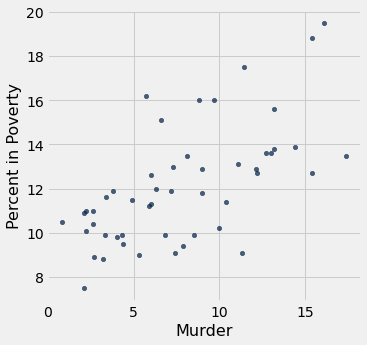

In [42]:
povcrime.scatter("Murder", "Percent in Poverty")

In [54]:
murder_mean = np.mean(povcrime.column("Murder"))
murder_std = np.std(povcrime.column("Murder"))
pip_mean = np.mean(povcrime.column("Percent in Poverty"))
pip_std = np.std(povcrime.column("Percent in Poverty"))

povcrime_standard = Table().with_columns(
    "Murder (standard units)", (povcrime.column("Murder") - murder_mean) / murder_std ,
    "pip (standard units)", (povcrime.column("Percent in Poverty") - pip_mean) / pip_std)
povcrime_standard

Murder (standard units),pip (standard units)
1.25518,1.32724
0.513019,-0.731088
0.0723607,0.52678
0.234708,1.47971
0.281093,-0.121213
0.0259756,-1.03603
-1.04088,-0.84544
-0.437875,-0.349916
1.76541,0.221842
2.22927,0.52678


In [55]:
r = np.mean(povcrime_standard.column(0) * povcrime_standard.column(1))
r

0.631043057309723

## We generally want an r that is greater than 0.7 in order to reject the null hypothesis.

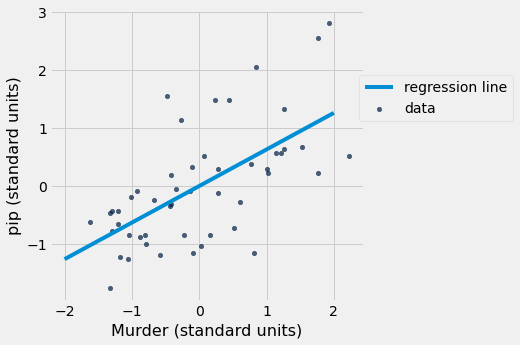

In [56]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line")
    plots.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(povcrime_standard, 
                   "Murder (standard units)", 
                   "pip (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

## We can find the slope and intercept of our regression line

In [57]:
slope = r * (pip_std / murder_std)
slope

0.3839596846999977

In [58]:
intercept = slope * (-murder_mean) + pip_mean
intercept

9.127721975556415

### We can make predictions with a mediocre level of certainty with the equation:

### pip = 0.384 * murder + 9.128

# Question 2: Does a state's unempoyment status effect the level of murder rates?

In [64]:
unemploycrime = crime.join("State", unemployment).select(0,1,2,3,4,7)
unemploycrime

State,Murder,Assault,UrbanPop,Rape,March
Alabama,13.2,236,58,21.2,2.9
Alaska,10,263,48,44.5,5
Arizona,8.1,294,80,31,3.3
Arkansas,8.8,190,50,19.5,3.1
California,9,276,91,40.6,4.9
Colorado,7.9,204,78,38.7,3.7
Connecticut,3.3,110,77,11.1,4.6
Delaware,5.9,238,72,15.8,4.5
Florida,15.4,335,80,31.9,3.2
Georgia,17.4,211,60,25.8,3.1


## A scatterplot can help us see if their is a linear relation

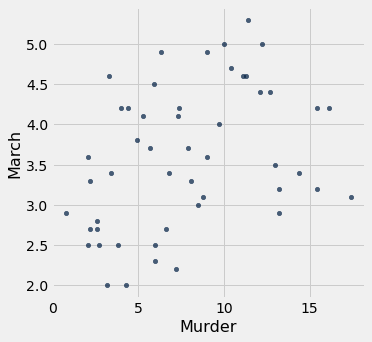

In [65]:
unemploycrime.scatter("Murder", "March")

In [66]:
murder_mean = np.mean(unemploycrime.column("Murder"))
murder_std = np.std(unemploycrime.column("Murder"))
unemploy_mean = np.mean(unemploycrime.column("March"))
unemploy_std = np.std(unemploycrime.column("March"))

unemploycrime_standard = Table().with_columns(
    "Murder (standard units)", (unemploycrime.column("Murder") - murder_mean) / murder_std ,
    "Unemployment (standard units)", (unemploycrime.column("March") - unemploy_mean) / unemploy_std)
unemploycrime_standard

Murder (standard units),Unemployment (standard units)
1.25518,-0.792146
0.513019,1.61176
0.0723607,-0.334258
0.234708,-0.563202
0.281093,1.49729
0.0259756,0.12363
-1.04088,1.15388
-0.437875,1.03941
1.76541,-0.44873
2.22927,-0.563202


In [67]:
r = np.mean(unemploycrime_standard.column(0) * unemploycrime_standard.column(1))
r

0.3696948929486741

## This r value is relatively low, thus the data does not appear to have a strong linear relationship

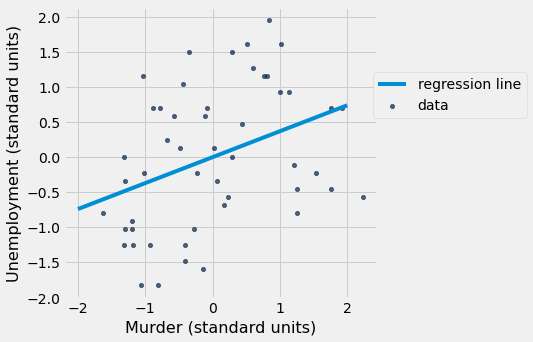

In [68]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line")
    plots.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(unemploycrime_standard, 
                   "Murder (standard units)", 
                   "Unemployment (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

## The slope and intercepts for our regression line are

In [69]:
slope = r * (unemploy_std / murder_std)
slope

0.07490182375869343

In [70]:
intercept = slope * (-murder_mean) + unemploy_mean
intercept

3.008664596567296

### With a very low certainty, we could predict unemployment rates or violent crime with the equation:

### unemployment = 0.075 * murder + 3.009

# Question 3: Does a states assault rates have any relation to umeployment rates?

In [72]:
unemploycrime = crime.join("State", unemployment).select(0,1,2,3,4,7)
unemploycrime

State,Murder,Assault,UrbanPop,Rape,March
Alabama,13.2,236,58,21.2,2.9
Alaska,10,263,48,44.5,5
Arizona,8.1,294,80,31,3.3
Arkansas,8.8,190,50,19.5,3.1
California,9,276,91,40.6,4.9
Colorado,7.9,204,78,38.7,3.7
Connecticut,3.3,110,77,11.1,4.6
Delaware,5.9,238,72,15.8,4.5
Florida,15.4,335,80,31.9,3.2
Georgia,17.4,211,60,25.8,3.1


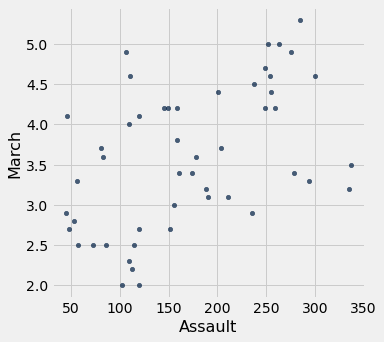

In [73]:
unemploycrime.scatter("Assault", "March")

In [74]:
assault_mean = np.mean(unemploycrime.column("Assault"))
assault_std = np.std(unemploycrime.column("Assault"))
unemploy_mean = np.mean(unemploycrime.column("March"))
unemploy_std = np.std(unemploycrime.column("March"))

unemploycrime_standard = Table().with_columns(
    "Assault (standard units)", (unemploycrime.column("Assault") - assault_mean) / assault_std ,
    "Unemployment (standard units)", (unemploycrime.column("March") - unemploy_mean) / unemploy_std)
unemploycrime_standard

Assault (standard units),Unemployment (standard units)
0.790787,-0.792146
1.11806,1.61176
1.49382,-0.334258
0.233212,-0.563202
1.27564,1.49729
0.402909,0.12363
-0.736484,1.15388
0.81503,1.03941
1.99079,-0.44873
0.487757,-0.563202


In [75]:
r = np.mean(unemploycrime_standard.column(0) * unemploycrime_standard.column(1))
r

0.4833358736362878

## This r value is relatively low, thus the data does not appear to have a strong linear relationship

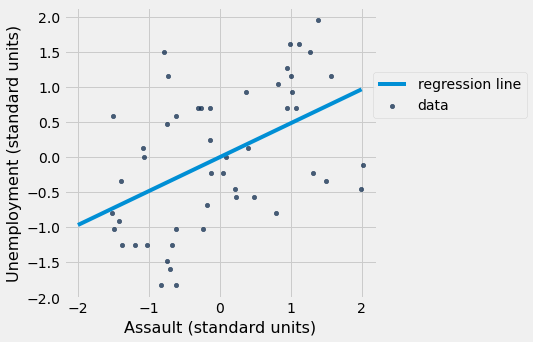

In [76]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line")
    plots.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(unemploycrime_standard, 
                   "Assault (standard units)", 
                   "Unemployment (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

## The slope and intercept of our regression lines are:

In [77]:
slope = r * (unemploy_std / murder_std)
slope

0.0979259900903892

In [78]:
intercept = slope * (-murder_mean) + unemploy_mean
intercept

2.8293523891760493

### With a very low certainty, we could predict unemployment rates or assault rates with the equation:

### unemployment = 0.098 * assault + 2.829

# Conclustion

Out of the three questions asked, no linear relationships were found strong enough to confidently be used in prediction. However, the analysis of poverty rate and murder was close. This is a relationship I would further examine once more data is collected, or with different data found.

None were completely without relation, so I would be wary saying there is or is not a correlation. I believe that money plays a big role in violent crime, but there are other important factors.

### To improve results I would find more data sets, try different statistical methods to find a relationship, and would allow more time for data to come out as Covid has probably skewed data

## Further questions to answer:

1. What did unemployment and poverty rates look like before, during, and after covid?

2. Have murder rates changed since Covid affected the world?